<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/12_1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кластеризация

Populating the interactive namespace from numpy and matplotlib


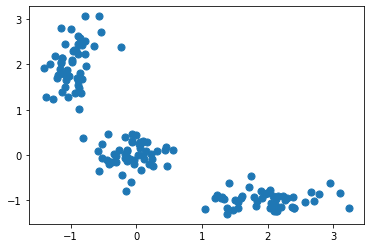

In [5]:
import sklearn
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%pylab inline

X = np.zeros((150,2))

np.random.seed(seed=42)

X[:50,0]=np.random.normal(loc=0.0, scale=.3, size=50)
X[:50,1]=np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100,0]=np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100,1]=np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150,0]=np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150,1]=np.random.normal(loc=2.0, scale=.5, size=50)


plt.scatter(X[..., 0], X[..., 1], s=50, cmap='viridis')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


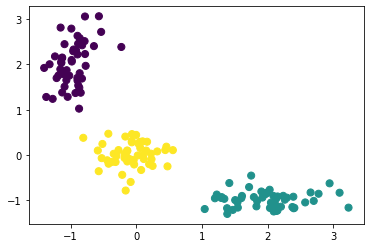

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.show()

Иерархическая кластеризация

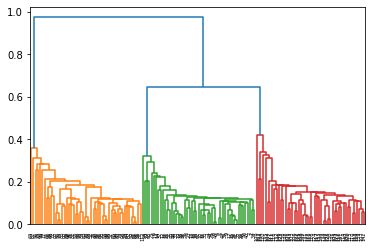

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X)

Z = hierarchy.linkage(distance_mat, 'single')
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

Что произойдет, если подобрать неверное число кластеров?

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

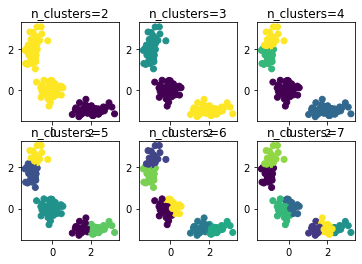

In [19]:
for n in range(2,8):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(X)
  clusters = kmeans.predict(X)
  plt.subplot(2, 3, n-1)
  plt.scatter(X[:, 0], X[:,1],c = clusters)
  plt.title('n_clusters={}'.format(n))

plt.show()

In [20]:
from sklearn.metrics import silhouette_score

DBSCAN

eps= 0.1 n= 2 score: 0.4255600679684237
eps= 0.2 n= 2 score: 0.4255600679684237
eps= 0.5 n= 2 score: 0.4255600679684237
eps= 1 n= 2 score: 0.4255600679684237
eps= 2 n= 2 score: 0.4255600679684237
eps= 0.1 n= 4 score: 0.4255600679684237
eps= 0.2 n= 4 score: 0.4255600679684237
eps= 0.5 n= 4 score: 0.4255600679684237
eps= 1 n= 4 score: 0.4255600679684237
eps= 2 n= 4 score: 0.4255600679684237
eps= 0.1 n= 8 score: 0.4255600679684237
eps= 0.2 n= 8 score: 0.4255600679684237
eps= 0.5 n= 8 score: 0.4255600679684237
eps= 1 n= 8 score: 0.4255600679684237
eps= 2 n= 8 score: 0.4255600679684237


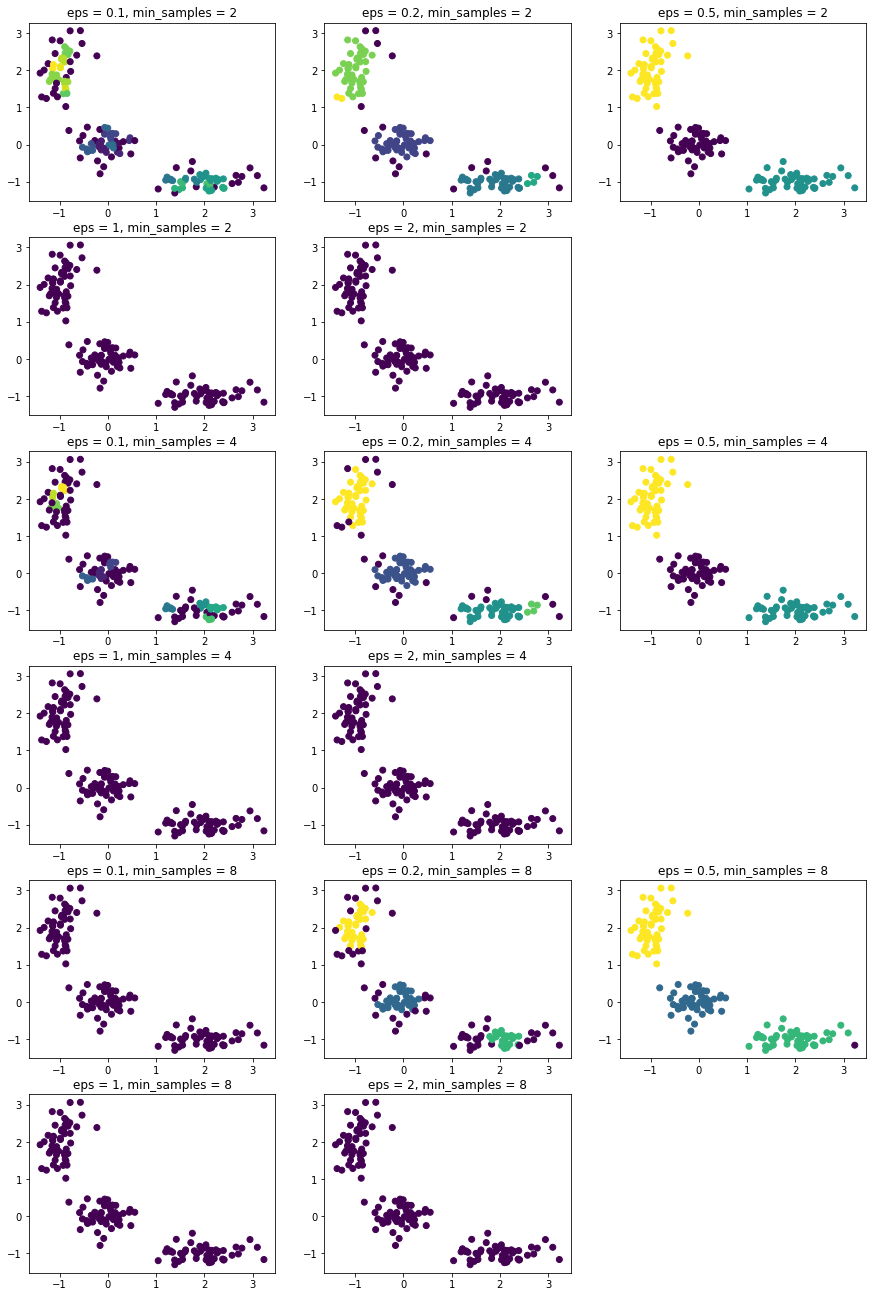

In [22]:
from sklearn.cluster import DBSCAN
plt.figure(figsize= (15,23))
i = 1
for samples in [2,4,8]:
  for e in [0.1, 0.2, 0.5, 1, 2]:
    dbscan = DBSCAN(eps=e, min_samples=samples)
    dbscan.fit(X)
    plt.subplot(6, 3, i)
    plt.scatter(X[:, 0], X[:,1], c=dbscan.labels_)
    plt.title('eps = {}, min_samples = {}'.format(e, samples))
    try:
        print('eps=',e,'n=',samples,'score:',silhouette_score(X, clusters))
    except ValueError:
        print('eps=',e,'n=',samples,'score:',-1)
    i += 1
  i += 1

plt.show()

Инициализация центроидов
Метод sklearn.KMeans содержит параметры n_init (число запусков из различных начальных приближений) и init. Есть три способа инициализации центроидов:



k-means++ – "умная" инициализация центроидов для ускорения сходимости.

random – случайная инициализация центроидов.

ndarray – заданная инициализация центроидов



Сжатие изображений с K-means

In [23]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving photo_2023-02-19_12-01-18.jpg to photo_2023-02-19_12-01-18.jpg
User uploaded file "photo_2023-02-19_12-01-18.jpg" with length 143126 bytes


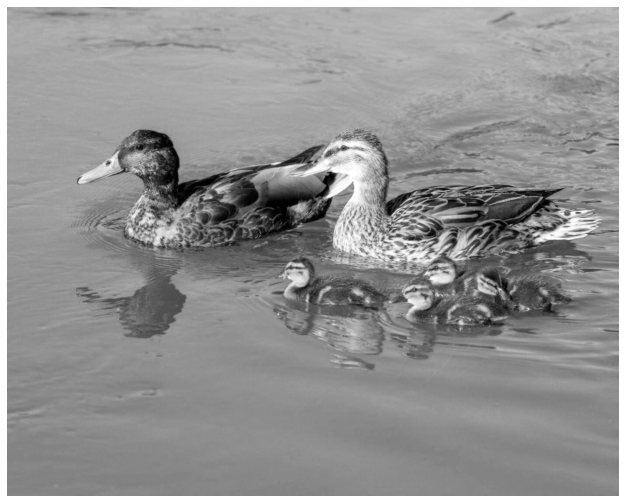

In [24]:
import matplotlib.image as mpimg
img = mpimg.imread('photo_2023-02-19_12-01-18.jpg')[..., 1]
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img, cmap='gray');

In [25]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

In [26]:
X = img.reshape((-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


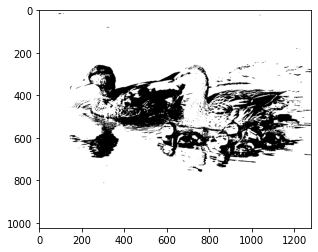

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
values = kmeans.cluster_centers_
labels = kmeans.labels_

img_compressed = values[labels].reshape(img.shape)

plt.imshow(img_compressed, cmap='gray')

Нахождение тем в текстах

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

categories = [
    'talk.politics.misc',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['talk.politics.misc', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3363 documents
4 categories


Закодируем тексты с помощью TF-IDF признаков.

In [34]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3363, n_features: 1000


И применим к получившимся векторам метод 
 средних и выведем метрики качества кластеризации.

In [35]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.472
Completeness: 0.540
V-measure: 0.504
Adjusted Rand-Index: 0.455
Adjusted mutual info score: 0.503
Silhouette Coefficient: 0.014


Выведем слова, соответствующие самым весомым компонентам центров кластеров.

In [37]:
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: space nasa henry gov toronto alaska moon shuttle launch orbit
Cluster 2: graphics university thanks image posting file ac host nntp com
Cluster 3: com people don god just cramer think like government university
Cluster 4: access digex sandvik pat net kent com apple prb newton


In [38]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
Im = digits.images

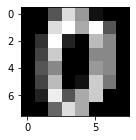

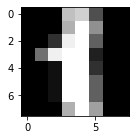

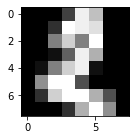

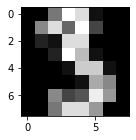

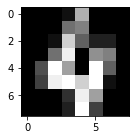

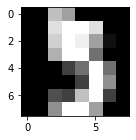

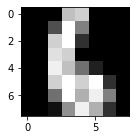

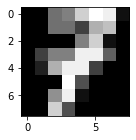

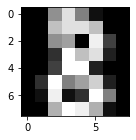

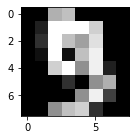

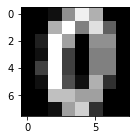

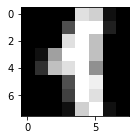

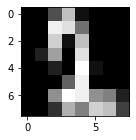

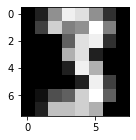

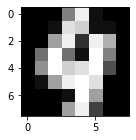

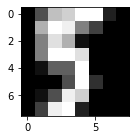

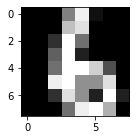

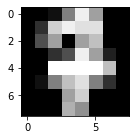

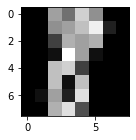

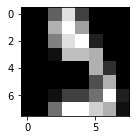

In [39]:
for i in range(20):
    plt.figure(figsize=(2,2))
    plt.imshow(Im[i], cmap='gray')
    plt.show()

In [40]:
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=1)

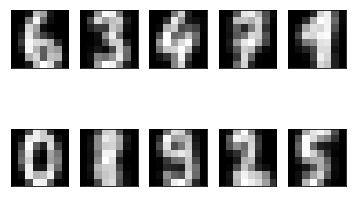

In [41]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), km.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Projecting 64-dimensional data to 2D


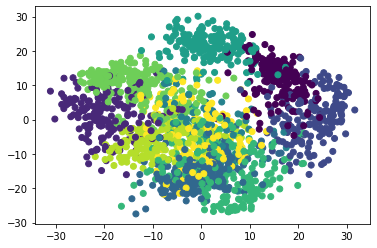

CPU times: user 385 ms, sys: 115 ms, total: 500 ms
Wall time: 564 ms


In [42]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=km.labels_)
plt.show()

CPU times: user 23.8 s, sys: 96 ms, total: 23.9 s
Wall time: 14.3 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

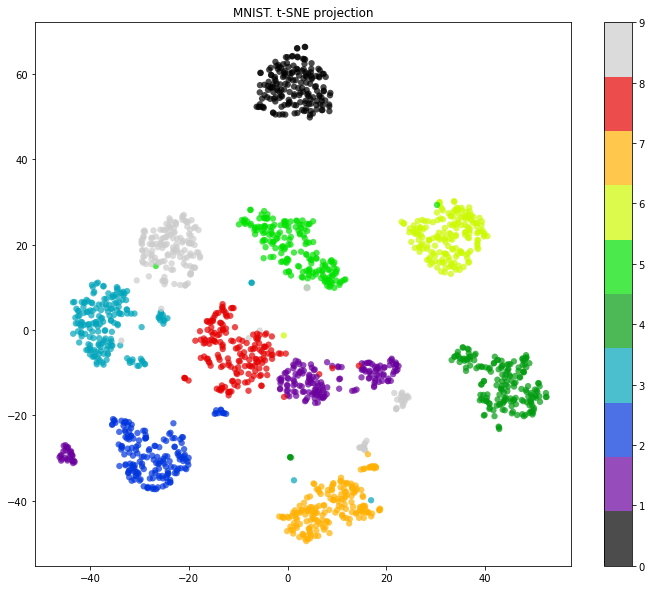

In [44]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X) # две координаты

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

In [45]:
for i in range(len(X_tsne)):
    if np.abs(X_tsne[i,0] - 30) < 2 and np.abs(X_tsne[i,1] - 25) < 2:
        print(i)

232
392
858
996
1683
1725


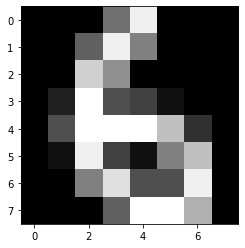

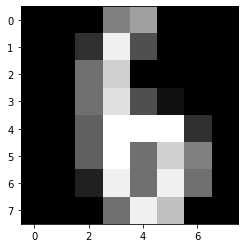

In [46]:
plt.imshow(Im[1521], cmap='gray')
plt.show()

plt.imshow(Im[1629], cmap='gray')
plt.show()